 Understanding the Data
First, let's understand what each column represents:

instant:       Record index

Date:        Date

season:        Season (1:spring, 2:summer, 3:fall, 4:winter)

year:            Year (0:2011, 1:2012)

month:         Month (1-12)

holiday:     Whether day is holiday or not

weekday:     Day of the week (0-6)

workingday:  If day is neither weekend nor holiday

weathersit:  Weather situation (1-4)

temp:        Normalized temperature

atemp:       Normalized feeling temperature

hum:         Normalized humidity

windspeed:   Normalized wind speed

casual:     Count of casual users

registered: Count of registered users

cnt:        Total count of bike rentals (casual + registered)

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
bike=pd.read_csv("bike.csv")

In [53]:
bike

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [54]:
bike.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [55]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [56]:
bike.shape

(17379, 17)

In [57]:
bike.isnull().sum()

,0
instant,0
date,0
season,0
year,0
month,0
hour,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [58]:
bike.describe()

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [59]:
 # converting in to datetime formate
 bike['date'] = pd.to_datetime(bike['date'])

In [60]:
#find below are the EDA plots to know more visualization and insights of the dataset " Bike.csv"
#1._lineplot:Trend analysis over seasons
#2._Lineplot:Trend analysis over months
#3._Line plot:Total bike rentals over Date
#4._Barplot: trend on bike rental based opn weather sitiation
#5._Boxplot:Number of bike rental over month by boxplot
#6._Scatterplot:Temperature effect on Bike rental
#7._#Correlation heatmap on bike rental

<Axes: xlabel='season', ylabel='cnt'>

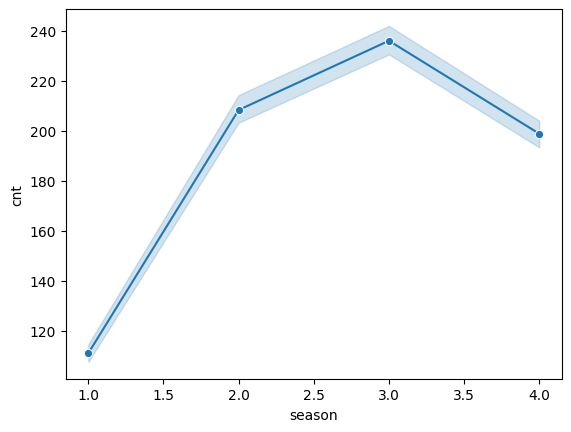

In [61]:
#1._trend analysis over seasons

sns.lineplot(data=bike,x="season",y="cnt",marker="o")

<Axes: xlabel='month', ylabel='cnt'>

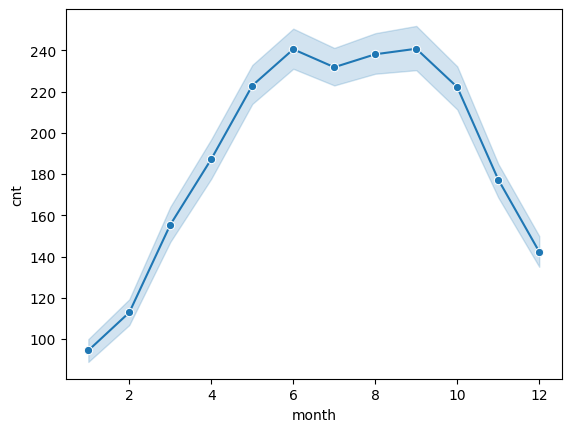

In [62]:
#trend analysis over months

sns.lineplot(data=bike,x="month",y="cnt",marker="o")

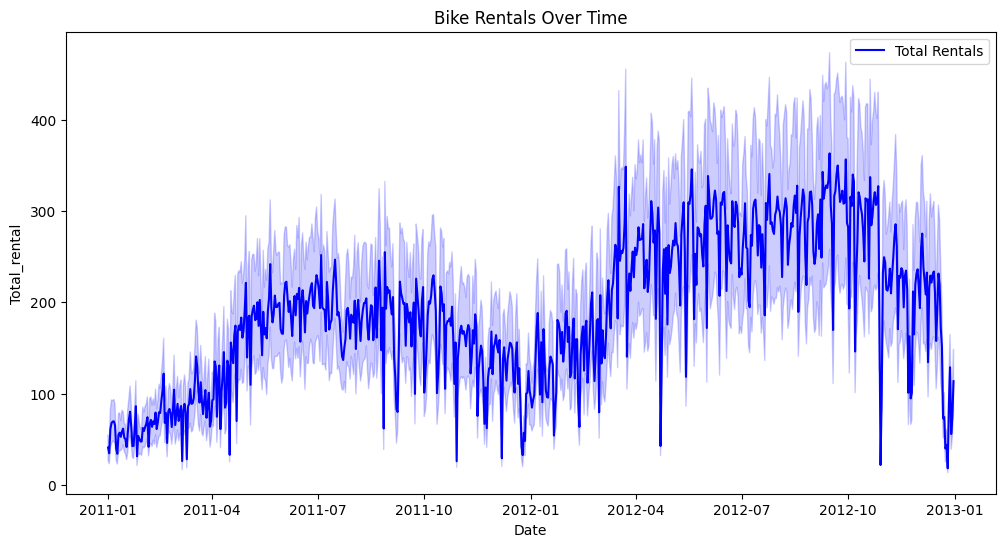

In [63]:
# Line plot for total bike rentals over Date
plt.figure(figsize=(12, 6))
sns.lineplot(data=bike, x='date', y='cnt', label='Total Rentals', color='blue')
plt.title('Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total_rental')
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

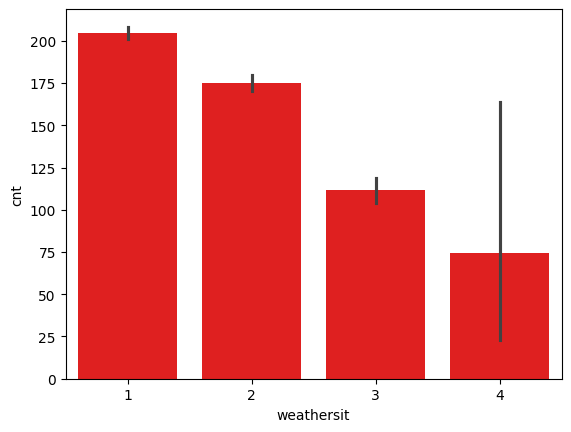

In [64]:
#trend on bike rental based opn weather sitiation

sns.barplot(data=bike,x="weathersit",y="cnt",color="r")

<Axes: xlabel='month', ylabel='cnt'>

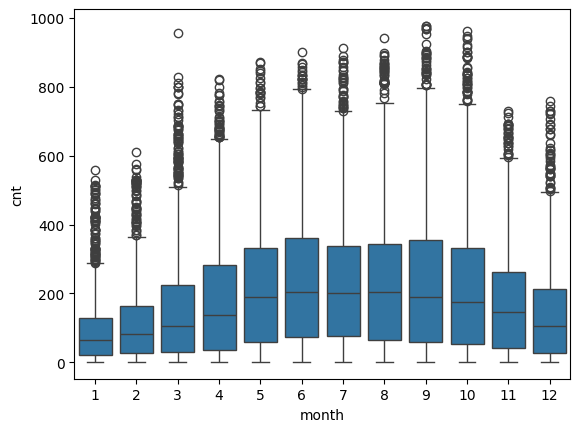

In [65]:
#number of bike rental over month by boxplot

sns.boxplot(data=bike,x="month",y="cnt")

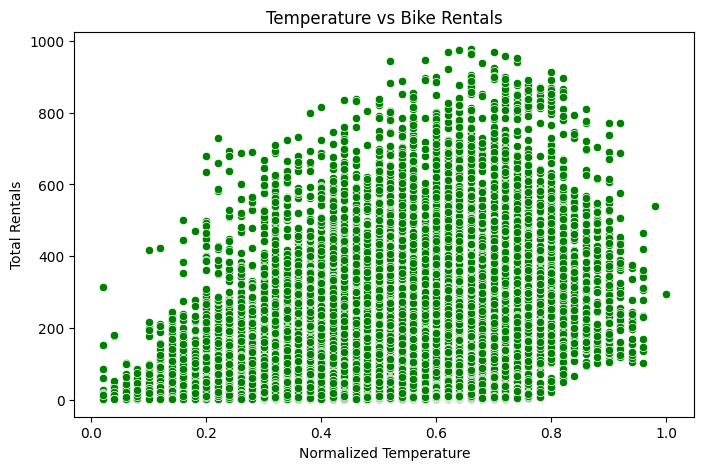

In [66]:
#Temperature effect on Bike rental
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=bike, color='green')
plt.title('Temperature vs Bike Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')
plt.show()

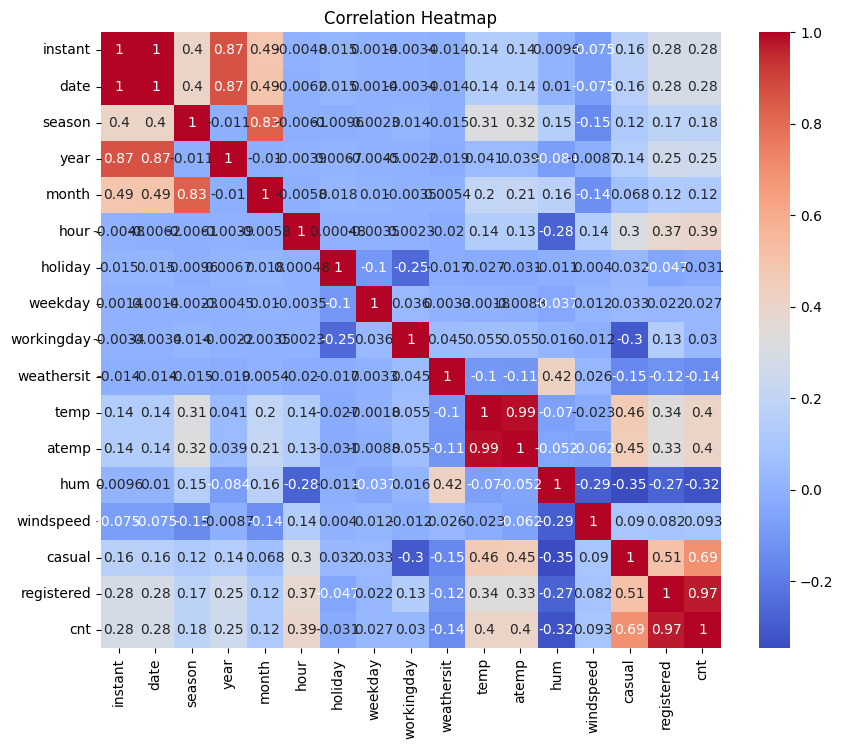

In [67]:
#Correlation heatmap on bike rental
plt.figure(figsize=(10, 8))
corr_matrix = bike.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [68]:
#finding out the Outliers

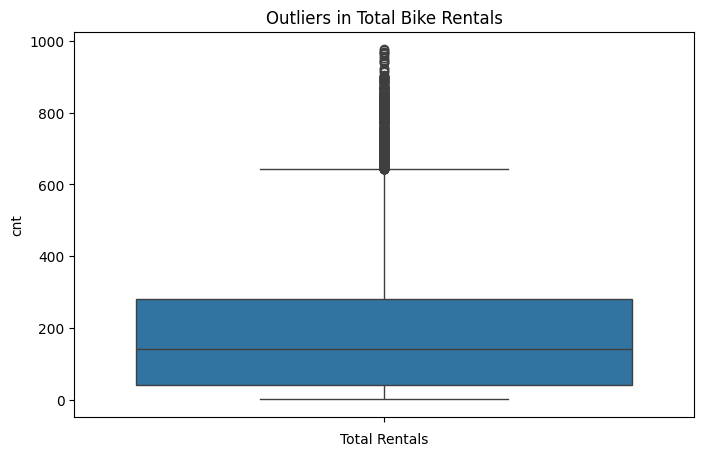

In [69]:
#Detecting Outliers in Total Rentals

plt.figure(figsize=(8, 5))
sns.boxplot(bike['cnt'])
plt.title('Outliers in Total Bike Rentals')
plt.xlabel('Total Rentals')
plt.show()

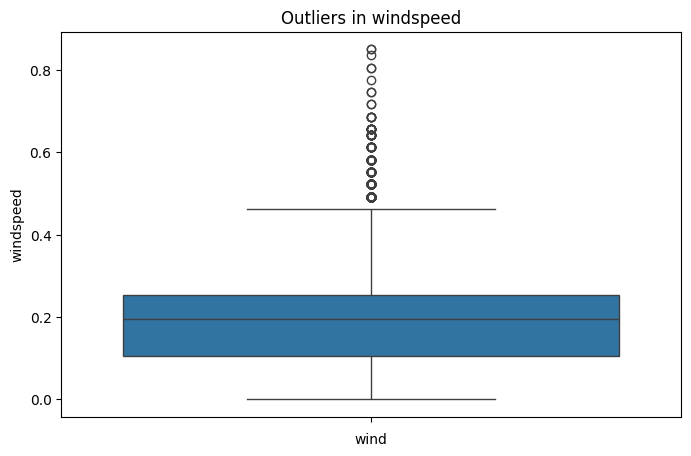

In [70]:
#Detecting Outliers in windspeed

plt.figure(figsize=(8, 5))
sns.boxplot(bike['windspeed'])
plt.title('Outliers in windspeed')
plt.xlabel('wind')
plt.show()

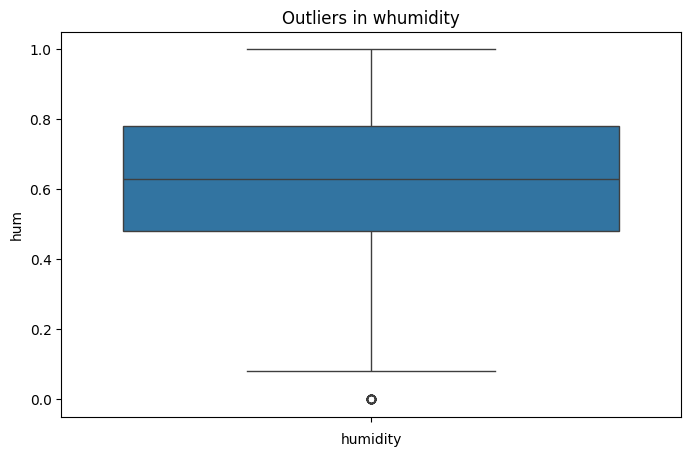

In [71]:
#Detecting Outliers in hum

plt.figure(figsize=(8, 5))
sns.boxplot(bike['hum'])
plt.title('Outliers in whumidity')
plt.xlabel('humidity')
plt.show()

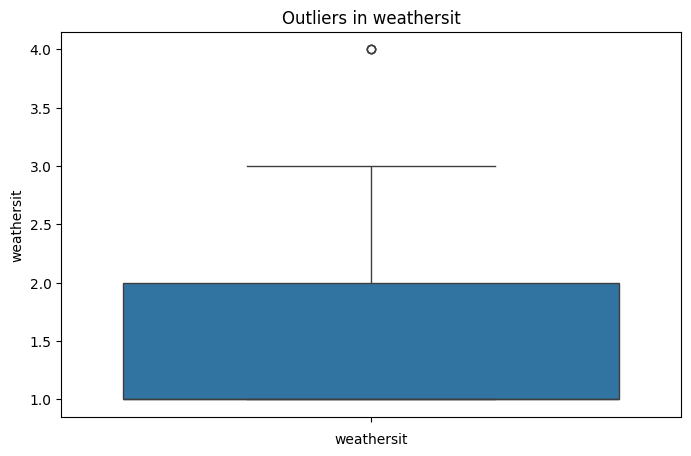

In [72]:
#Detecting Outliers in weathersit

plt.figure(figsize=(8, 5))
sns.boxplot(bike['weathersit'])
plt.title('Outliers in weathersit')
plt.xlabel('weathersit')
plt.show()

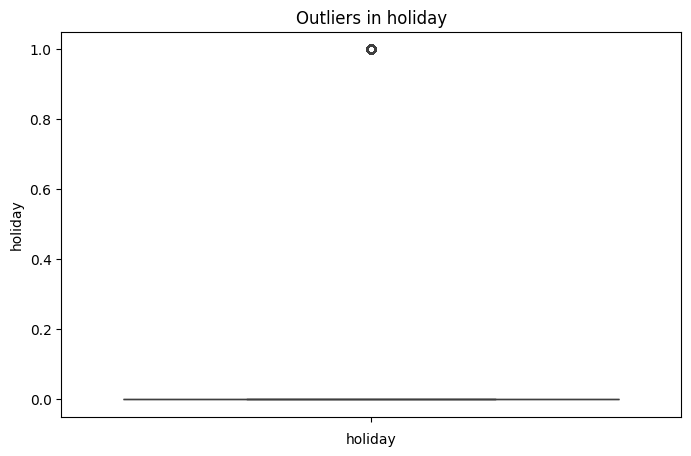

In [73]:
#Detecting Outliers in holiday

plt.figure(figsize=(8, 5))
sns.boxplot(bike['holiday'])
plt.title('Outliers in holiday')
plt.xlabel('holiday')
plt.show()

In [74]:
#.1_ IQR Method for number_of_bike_rental Outlier Detection
Q1 = bike['cnt'].quantile(0.25)
Q3 = bike['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bike[(bike['cnt'] < lower_bound) | (bike['cnt'] > upper_bound)]

print(f'Number of outliers detected: {len(outliers)}')
print(outliers[['date', 'cnt']])

Number of outliers detected: 505
            date  cnt
5536  2011-08-23  651
10358 2012-03-12  644
10359 2012-03-12  712
10382 2012-03-13  676
10383 2012-03-13  734
...          ...  ...
16885 2012-12-11  724
16909 2012-12-12  688
16933 2012-12-13  679
17053 2012-12-18  662
17077 2012-12-19  678

[505 rows x 2 columns]


In [75]:
#.1_ IQR Method for windspeed Outlier Detection
Q1 = bike['windspeed'].quantile(0.25)
Q3 = bike['windspeed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bike[(bike['windspeed'] < lower_bound) | (bike['windspeed'] > upper_bound)]

print(f'Number of outliers detected: {len(outliers)}')
print(outliers[['date', 'windspeed']])

Number of outliers detected: 342
            date  windspeed
175   2011-01-08     0.4925
178   2011-01-08     0.5522
194   2011-01-09     0.5224
196   2011-01-09     0.5224
265   2011-01-12     0.5821
...          ...        ...
17327 2012-12-29     0.5522
17328 2012-12-29     0.4925
17341 2012-12-30     0.5821
17343 2012-12-30     0.5821
17344 2012-12-30     0.6567

[342 rows x 2 columns]


In [76]:
#.1_ IQR Method for hum Outlier Detection
Q1 = bike['hum'].quantile(0.25)
Q3 = bike['hum'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bike[(bike['hum'] < lower_bound) | (bike['hum'] > upper_bound)]

print(f'Number of outliers detected: {len(outliers)}')
print(outliers[['date', 'hum']])

Number of outliers detected: 22
           date  hum
1551 2011-03-10  0.0
1552 2011-03-10  0.0
1553 2011-03-10  0.0
1554 2011-03-10  0.0
1555 2011-03-10  0.0
1556 2011-03-10  0.0
1557 2011-03-10  0.0
1558 2011-03-10  0.0
1559 2011-03-10  0.0
1560 2011-03-10  0.0
1561 2011-03-10  0.0
1562 2011-03-10  0.0
1563 2011-03-10  0.0
1564 2011-03-10  0.0
1565 2011-03-10  0.0
1566 2011-03-10  0.0
1567 2011-03-10  0.0
1568 2011-03-10  0.0
1569 2011-03-10  0.0
1570 2011-03-10  0.0
1571 2011-03-10  0.0
1572 2011-03-10  0.0


In [77]:
#.1_ IQR Method for holidayt Outlier Detection
Q1 = bike['holiday'].quantile(0.25)
Q3 = bike['holiday'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bike[(bike['holiday'] < lower_bound) | (bike['holiday'] > upper_bound)]

print(f'Number of outliers detected: {len(outliers)}')
print(outliers[['date', 'holiday']])

Number of outliers detected: 500
            date  holiday
372   2011-01-17        1
373   2011-01-17        1
374   2011-01-17        1
375   2011-01-17        1
376   2011-01-17        1
...          ...      ...
17230 2012-12-25        1
17231 2012-12-25        1
17232 2012-12-25        1
17233 2012-12-25        1
17234 2012-12-25        1

[500 rows x 2 columns]


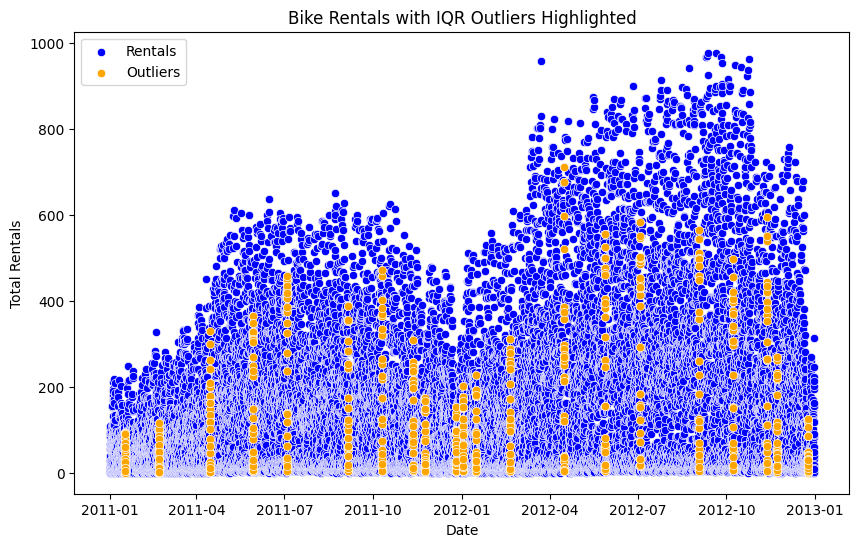

In [78]:
# Visualization of IQR Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bike, x='date', y='cnt', label='Rentals', color='blue')
sns.scatterplot(data=outliers, x='date', y='cnt', label='Outliers', color='orange')
plt.title('Bike Rentals with IQR Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()

In [79]:
# Capping outliers using IQR method
for col in bike.select_dtypes(include='number').columns:
    Q1 = bike[col].quantile(0.25)
    Q3 = bike[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping
    bike[col] = np.where(bike[col] < lower_bound, lower_bound,
                         np.where(bike[col] > upper_bound, upper_bound, df[col]))

**Model_Building**

In [80]:
bike.head(3)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0


In [81]:
bike.head(1)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0


In [82]:
bike.dtypes

,0
instant,float64
date,datetime64[ns]
season,float64
year,float64
month,float64
hour,float64
holiday,float64
weekday,float64
workingday,float64
weathersit,float64


In [87]:
#Converting_rent_date column to seperate columns
bike['date'] = pd.to_datetime(bike['date'], errors='coerce')
bike['rent_day'] = bike['date'].dt.day
bike['rent_month'] = bike['date'].dt.month
bike['rent_year'] = bike['date'].dt.year
bike['rent_weekday'] = bike['date'].dt.weekday

In [88]:
bike.head(3)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,rent_day,rent_month,rent_year,rent_weekday
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,...,0.2879,0.81,0.0,3.0,13.0,16.0,1,1,2011,5
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,...,0.2727,0.80,0.0,8.0,32.0,40.0,1,1,2011,5
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,...,0.2727,0.80,0.0,5.0,27.0,32.0,1,1,2011,5


In [90]:
bike.drop('date', axis=1, inplace=True)

In [91]:
bike.dtypes

,0
instant,float64
season,float64
year,float64
month,float64
hour,float64
holiday,float64
weekday,float64
workingday,float64
weathersit,float64
temp,float64


In [93]:
cnt = "casual" + "registered"

In [94]:
bike = bike.drop(['casual', 'registered'], axis=1)

In [95]:
bike.head(1)

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,rent_day,rent_month,rent_year,rent_weekday
0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,16.0,1,1,2011,5


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [97]:
#Applying_all_possibile_regressions
#Linear_regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [99]:
# X and y allocation
X = bike.drop("cnt", axis=1)
y = bike["cnt"]

In [100]:
X.head(2)

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rent_day,rent_month,rent_year,rent_weekday
0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,1,1,2011,5
1,2.0,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,1,1,2011,5


In [101]:
y.head(2)

,cnt
0,16.0
1,40.0


In [102]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Train
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [104]:
#predictions
y_pred = regressor.predict(X_test)

In [105]:
regressor.predict([[1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,1,1,2011,5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-63.63038225])

In [106]:
y_pred=regressor.predict(X_test)
y_pred

array([434.66473452, 219.60979163,  58.65977101, ...,  52.40401522,
       203.73901204, 210.60308776])

In [107]:
y_test

,cnt
12830,425.0
8688,88.0
7091,4.0
12230,526.0
431,13.0
...,...
6759,17.0
13989,85.0
173,98.0
16192,266.0


In [109]:
from sklearn.metrics import mean_squared_error
import numpy as np

# MAE remains the same
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# R² score (you had this duplicated in your original code)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score LinearRegression:", round(r2*100, 2))

Mean Absolute Error (MAE): 100.57
Root Mean Squared Error (RMSE): 130.45
R² Score LinearRegression: 40.16


In [110]:
#Randm_forest_Regressor
from sklearn.ensemble import RandomForestRegressor

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Train
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [113]:
#predictions
rf_preds = rf_model.predict(X_test)

In [114]:
#MAE and RMSE
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_preds)

print("Mean Absolute Error (MAE):", round(rf_mae, 2))
print("Root Mean Squared Error (RMSE):", round(rf_rmse, 2))

# R2_Score
rf_r2 = r2_score(y_test, rf_preds)
print("R² Score (RandomForestRegressor):", round(rf_r2*100))

Mean Absolute Error (MAE): 22.68
Root Mean Squared Error (RMSE): 38.31
R² Score (RandomForestRegressor): 95


In [115]:
# Decision_Tree_Regressor
from sklearn.tree import DecisionTreeRegressor


In [116]:
# Train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [117]:
# Predict on the test data
dt_preds = dt_model.predict(X_test)

In [118]:
#MAE and RMSE
dt_mse = mean_squared_error(y_test, dt_preds)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, dt_preds)

print("Mean Absolute Error (MAE):", round(dt_mae, 2))
print("Root Mean Squared Error (RMSE):", round(dt_rmse, 2))

# R² Score
dt_r2 = r2_score(y_test, dt_preds)
print("R² Score (DecisionTreeRegressor):", round(dt_r2*100))

Mean Absolute Error (MAE): 32.2
Root Mean Squared Error (RMSE): 56.35
R² Score (DecisionTreeRegressor): 89


In [119]:
#KNN_Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [120]:
#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
#Train KNN Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [122]:
#Predict
knn_preds = knn_model.predict(X_test_scaled)


In [123]:
#MAE and RMSE
knn_mse = mean_squared_error(y_test, knn_preds)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test, knn_preds)

print("Mean Absolute Error (MAE):", round(knn_mae, 2))
print("Root Mean Squared Error (RMSE):", round(knn_rmse, 2))

# R² Score
knn_r2 = r2_score(y_test, knn_preds)
print("R² Score (KNeighborsRegressor):", round(knn_r2*100))

Mean Absolute Error (MAE): 76.82
Root Mean Squared Error (RMSE): 109.6
R² Score (KNeighborsRegressor): 58


In [124]:
#SVR
from sklearn.svm import SVR

In [125]:
#Train Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

SVR()

In [126]:
#Predict
svr_preds = svr_model.predict(X_test_scaled)


In [127]:
#MAE and RMSE
svr_mse = mean_squared_error(y_test, svr_preds)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, svr_preds)

print("Mean Absolute Error (MAE):", round(svr_mae, 2))
print("Root Mean Squared Error (RMSE):", round(svr_rmse, 2))

# R² Score
svr_r2 = r2_score(y_test, svr_preds)
print("R² Score (SVR):", round(svr_r2*100))

Mean Absolute Error (MAE): 87.75
Root Mean Squared Error (RMSE): 129.57
R² Score (SVR): 41


In [128]:
# Ridge Regression
from sklearn.linear_model import Ridge

In [129]:
#Train Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [130]:
#Predict
ridge_preds = ridge_model.predict(X_test)

In [131]:
#MAE and RMSE
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_preds)

print("Mean Absolute Error (MAE):", round(ridge_mae, 2))
print("Root Mean Squared Error (RMSE):", round(ridge_rmse, 2))

# R² Score
ridge_r2 = r2_score(y_test, ridge_preds)
print("R² Score (Ridge Regression):", round(ridge_r2*100))

Mean Absolute Error (MAE): 100.58
Root Mean Squared Error (RMSE): 130.46
R² Score (Ridge Regression): 40


In [132]:
#Lasso_regressor
from sklearn.linear_model import Lasso

In [133]:
# Train Lasso Regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [134]:
#Predict
lasso_preds = lasso_model.predict(X_test)

In [135]:
#MAE and RMSE
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, lasso_preds)

print("Mean Absolute Error (MAE):", round(lasso_mae, 2))
print("Root Mean Squared Error (RMSE):", round(lasso_rmse, 2))

# R² Score
lasso_r2 = r2_score(y_test, lasso_preds)
print("R² Score (Lasso Regression):", round(lasso_r2*100))

Mean Absolute Error (MAE): 100.8
Root Mean Squared Error (RMSE): 131.16
R² Score (Lasso Regression): 40


In [136]:
#Collect R² scores from all models
r2_scores = {
    "Linear Regression":r2,
    "Decision Tree Regressor": dt_r2,
    "Random Forest Regressor": rf_r2,
    "KNN Regressor": knn_r2,
    "SVR": svr_r2,
    "Ridge Regression": ridge_r2,
    "Lasso Regression": lasso_r2
}

RMSE_values={
    "Linear Regression":rmse,
    "Decision Tree Regressor": dt_rmse,
    "Random Forest Regressor": rf_rmse,
    "KNN Regressor": knn_rmse,
    "SVR": svr_rmse,
    "Ridge Regression": ridge_rmse,
    "Lasso Regression": lasso_rmse
}


MAE_Values={
    "Linear Regression":mae,
    "Decision Tree Regressor": dt_mae,
    "Random Forest Regressor": rf_mae,
    "KNN Regressor": knn_mae,
    "SVR": svr_mae,
    "Ridge Regression": ridge_mae,
    "Lasso Regression": lasso_mae
}
#  Create a DataFrame for better visualization
r2_bike = pd.DataFrame(list(r2_scores.items()), columns=["Model", "R2 Score"]).sort_values(by="R2 Score", ascending=False)
print(r2_bike)

print()
rmse_bike=pd.DataFrame(list(RMSE_values.items()), columns=["Model", "RMSE Values"]).sort_values(by="RMSE Values", ascending=True)
print(rmse_bike)

print()
mae_bike=pd.DataFrame(list(MAE_Values.items()), columns=["Model", "MAE Values"]).sort_values(by="MAE Values", ascending=True)
print(rmse_bike)

                     Model  R2 Score
2  Random Forest Regressor  0.948388
1  Decision Tree Regressor  0.888323
3            KNN Regressor  0.577573
4                      SVR  0.409610
0        Linear Regression  0.401557
5         Ridge Regression  0.401460
6         Lasso Regression  0.395056

                     Model  RMSE Values
2  Random Forest Regressor    38.309986
1  Decision Tree Regressor    56.353237
3            KNN Regressor   109.600460
4                      SVR   129.570526
0        Linear Regression   130.451110
5         Ridge Regression   130.461774
6         Lasso Regression   131.157774

                     Model  RMSE Values
2  Random Forest Regressor    38.309986
1  Decision Tree Regressor    56.353237
3            KNN Regressor   109.600460
4                      SVR   129.570526
0        Linear Regression   130.451110
5         Ridge Regression   130.461774
6         Lasso Regression   131.157774


In [137]:
#Results from regresions
#Random Forest Regressor performs the best, capturing complex patterns with high accuracy.

In [138]:
#Model Performance Visualization (Bar Plots)


In [139]:
#one DataFrame
metrics_bike = r2_bike.merge(rmse_bike, on="Model").merge(mae_bike, on="Model")
print(metrics_bike)

                     Model  R2 Score  RMSE Values  MAE Values
0  Random Forest Regressor  0.948388    38.309986   22.683001
1  Decision Tree Regressor  0.888323    56.353237   32.204402
2            KNN Regressor  0.577573   109.600460   76.824511
3                      SVR  0.409610   129.570526   87.751593
4        Linear Regression  0.401557   130.451110  100.570575
5         Ridge Regression  0.401460   130.461774  100.579720
6         Lasso Regression  0.395056   131.157774  100.800416


/tmp/ipython-input-140-3778425399.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_bike, x="R2 Score", y="Model", palette="viridis")
/tmp/ipython-input-140-3778425399.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_bike, x="RMSE Values", y="Model", palette="magma")
/tmp/ipython-input-140-3778425399.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_bike, x="MAE Values", y="Model", palette="coolwarm")


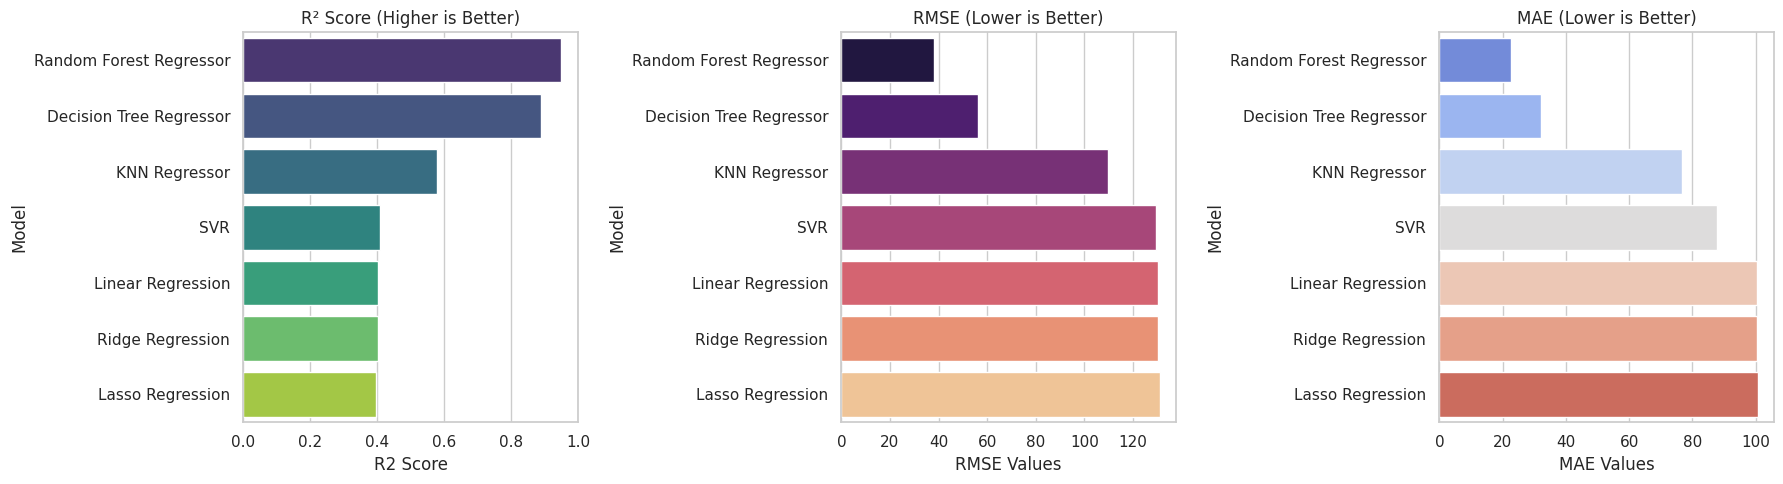

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# R² Score
plt.subplot(1, 3, 1)
sns.barplot(data=metrics_bike, x="R2 Score", y="Model", palette="viridis")
plt.title("R² Score (Higher is Better)")
plt.xlim(0, 1)

# RMSE
plt.subplot(1, 3, 2)
sns.barplot(data=metrics_bike, x="RMSE Values", y="Model", palette="magma")
plt.title("RMSE (Lower is Better)")

# MAE
plt.subplot(1, 3, 3)
sns.barplot(data=metrics_bike, x="MAE Values", y="Model", palette="coolwarm")
plt.title("MAE (Lower is Better)")

plt.tight_layout()
plt.show()

In [141]:
bike.to_csv("bike1.csv",index=False)

In [ ]:
#Classification Algorithm:

In [145]:
# Convert the continuous target into 3 classes using quantiles
bike['rental_class'] = pd.qcut(bike['cnt'], q=3, labels=['Low', 'Medium', 'High'])

# Check distribution of classes
bike['rental_class'].value_counts()

,count
rental_class,
Medium,5823
Low,5797
High,5759


In [146]:
bike.head(2)

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,rent_day,rent_month,rent_year,rent_weekday,rental_class
0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,16.0,1,1,2011,5,Low
1,2.0,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,40.0,1,1,2011,5,Low


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [149]:
X = bike.drop(columns=['instant', 'cnt', 'rental_class','rent_weekday','rent_year','rent_month','rent_day'])
y = bike['rental_class']

In [150]:
X.head(2)

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0
1,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0


In [151]:
y.head(2)

,rental_class
0,Low
1,Low


In [152]:
#Train_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [154]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [155]:
X_train

array([[-0.45861479,  0.98933971, -0.73847578, ...,  0.04646524,
        -1.38314854, -1.59287642],
       [ 0.44579959, -1.01077516,  0.71862575, ..., -0.04135373,
         0.22788016,  0.30378913],
       [ 1.35021397,  0.98933971,  1.30146636, ..., -1.09867085,
         0.6436295 , -0.70765288],
       ...,
       [-0.45861479,  0.98933971, -0.44705548, ...,  0.31108531,
         1.05937884, -1.59287642],
       [-0.45861479, -1.01077516, -0.44705548, ...,  0.22326634,
         1.9428462 , -0.70765288],
       [-1.36302916,  0.98933971, -1.32131639, ..., -0.3059738 ,
        -1.27921121,  0.05050507]])

In [156]:
#Train
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [157]:
#new input prediction

classifier.predict(sc.transform([[1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Low'], dtype=object)

In [158]:
y_pred=classifier.predict(X_test)
df=pd.DataFrame(y_pred,y_test)
df

,0
rental_class,
High,High
Low,Low
Low,High
Low,Low
Medium,Medium
...,...
High,High
High,High
High,High


In [162]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix",cm)
print()
accuracy_log=accuracy_score(y_test,y_pred)
print("accuracy_score_LogisticRegression",accuracy_log)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

confusion matrix [[755 128 241]
 [ 59 965 161]
 [329 315 523]]

accuracy_score_LogisticRegression 0.6452819332566168

Classification Report:
               precision    recall  f1-score   support

        High       0.66      0.67      0.67      1124
         Low       0.69      0.81      0.74      1185
      Medium       0.57      0.45      0.50      1167

    accuracy                           0.65      3476
   macro avg       0.64      0.64      0.64      3476
weighted avg       0.64      0.65      0.64      3476



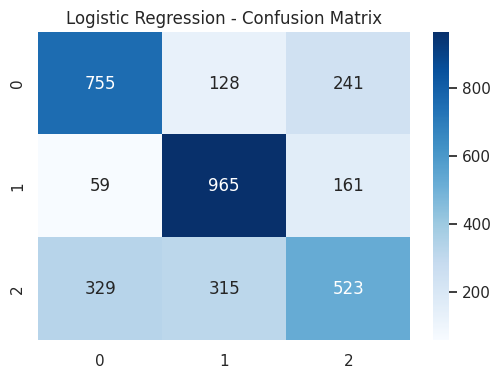

In [163]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

In [164]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [165]:
classifier=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [166]:
ky_pred=classifier.predict(X_test)
df=pd.DataFrame(ky_pred,y_test)

In [167]:
cm=confusion_matrix(y_test,ky_pred)
print("confusion_matrix",cm)
print()
accuracy_knn=accuracy_score(y_test,ky_pred)
print('accuracy_score_KNNClassifier',accuracy_knn)
print("\nClassification Report:\n", classification_report(y_test, ky_pred))

confusion_matrix [[ 878   60  186]
 [  48 1027  110]
 [ 290  260  617]]

accuracy_score_KNNClassifier 0.7255466052934407

Classification Report:
               precision    recall  f1-score   support

        High       0.72      0.78      0.75      1124
         Low       0.76      0.87      0.81      1185
      Medium       0.68      0.53      0.59      1167

    accuracy                           0.73      3476
   macro avg       0.72      0.73      0.72      3476
weighted avg       0.72      0.73      0.72      3476



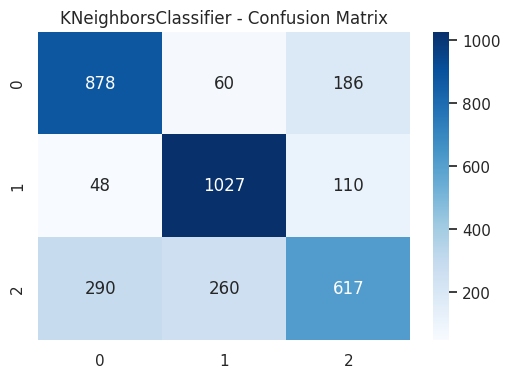

In [168]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,ky_pred), annot=True, fmt='d', cmap="Blues")
plt.title("KNeighborsClassifier - Confusion Matrix")
plt.show()

In [169]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="gini",max_depth=3)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [171]:
dy_pred=classifier.predict(X_test)
df=pd.DataFrame(dy_pred,y_test)

In [172]:
cm=confusion_matrix(y_test,dy_pred)
print('confusion_matrix',cm)
accuracy_dtree=accuracy_score(y_test,dy_pred)
print('accuracy_score_Decision_Tree_Classifier',accuracy_dtree)
print("\nClassification Report:\n", classification_report(y_test, dy_pred))

confusion_matrix [[846  39 239]
 [ 61 931 193]
 [424 176 567]]
accuracy_score_Decision_Tree_Classifier 0.6743383199079401

Classification Report:
               precision    recall  f1-score   support

        High       0.64      0.75      0.69      1124
         Low       0.81      0.79      0.80      1185
      Medium       0.57      0.49      0.52      1167

    accuracy                           0.67      3476
   macro avg       0.67      0.67      0.67      3476
weighted avg       0.67      0.67      0.67      3476



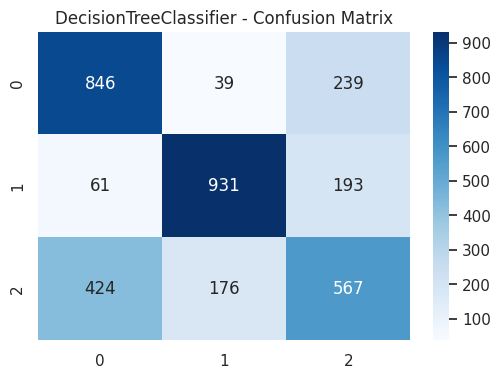

In [173]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,dy_pred), annot=True, fmt='d', cmap="Blues")
plt.title("DecisionTreeClassifier - Confusion Matrix")
plt.show()

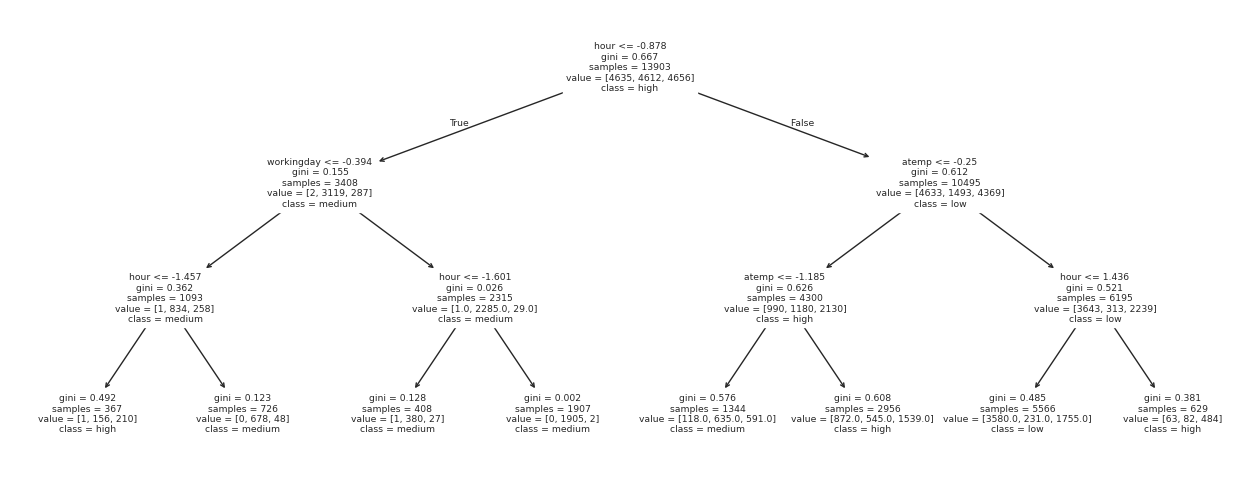

In [174]:
#Tree ploting
from sklearn.tree import plot_tree
plt.figure(figsize=(16,6))
plot_tree(classifier,feature_names=['season','year','month','hour','holiday','weekday','workingday','weathersit	temp','atemp','hum','windspeed'],class_names=["low","medium","high"])
plt.show()

In [175]:
#RandomForestClassifier

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.pipeline import Pipeline

In [177]:
scaler=StandardScaler()
X_train_standardized=scaler.fit_transform(X_train)
X_test_standardized=scaler.transform(X_test)

In [178]:
normalizer=Normalizer()
X_train_normalized=normalizer.fit_transform(X_train)
X_test_normalized=normalizer.transform(X_test)

In [179]:
# Create Pipeline with sStandardScaler and RandomForest
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('classifier',RandomForestClassifier(n_estimators=100))
])

In [180]:
#train and Evaluate using cross_validation
cv=StratifiedKFold(n_splits=5,shuffle=True)
cv_score=cross_val_score(pipeline,X_train,y_train,cv=cv,scoring="accuracy")

In [181]:
#Train final model
pipeline.fit(X_train,y_train)
ry_pred=pipeline.predict(X_test)

In [182]:
accuracy_rf=accuracy_score(y_test,ry_pred)

In [183]:
print("cross validation accuracy score",cv_score)
print("\nClassification Report:\n", classification_report(y_test, ry_pred))
print("accuracy_score_RandomForestClassifier",accuracy_rf)

cross validation accuracy score [0.86587558 0.87306724 0.86371809 0.87014388 0.87913669]

Classification Report:
               precision    recall  f1-score   support

        High       0.89      0.90      0.89      1124
         Low       0.93      0.92      0.92      1185
      Medium       0.82      0.82      0.82      1167

    accuracy                           0.88      3476
   macro avg       0.88      0.88      0.88      3476
weighted avg       0.88      0.88      0.88      3476

accuracy_score_RandomForestClassifier 0.879746835443038


In [184]:
#SVC

In [185]:
from sklearn.svm import SVC
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVC model
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)

# Predict and evaluate
sy_pred = svc.predict(X_test_scaled)

accuracy_svc=accuracy_score(y_test, sy_pred)
print("Accuracy:",accuracy_svc)
print("\nClassification Report:\n", classification_report(y_test, sy_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, sy_pred))

Accuracy: 0.7649597238204833

Classification Report:
               precision    recall  f1-score   support

        High       0.79      0.77      0.78      1124
         Low       0.83      0.89      0.86      1185
      Medium       0.67      0.63      0.65      1167

    accuracy                           0.76      3476
   macro avg       0.76      0.76      0.76      3476
weighted avg       0.76      0.76      0.76      3476


Confusion Matrix:
 [[ 860   17  247]
 [   6 1059  120]
 [ 222  205  740]]


In [186]:
#Collect accuracies scores from all models
ac_scores = {
    "ogistic Regression:":accuracy_log,
    "KNN": accuracy_knn,
    "Decision Tree": accuracy_dtree,
    "Random Forest": accuracy_rf,
    "SVC": accuracy_svc
}

#  Create a DataFrame for better visualization
ac_bike = pd.DataFrame(list(ac_scores.items()), columns=["Model", "ac Score"]).sort_values(by="ac Score", ascending=False)
print(ac_bike)

                 Model  ac Score
3        Random Forest  0.879747
4                  SVC  0.764960
1                  KNN  0.725547
2        Decision Tree  0.674338
0  ogistic Regression:  0.645282


In [187]:
#The Random Forest Classifier delivered the highest accuracy at 88.55%, indicating it's the most reliable

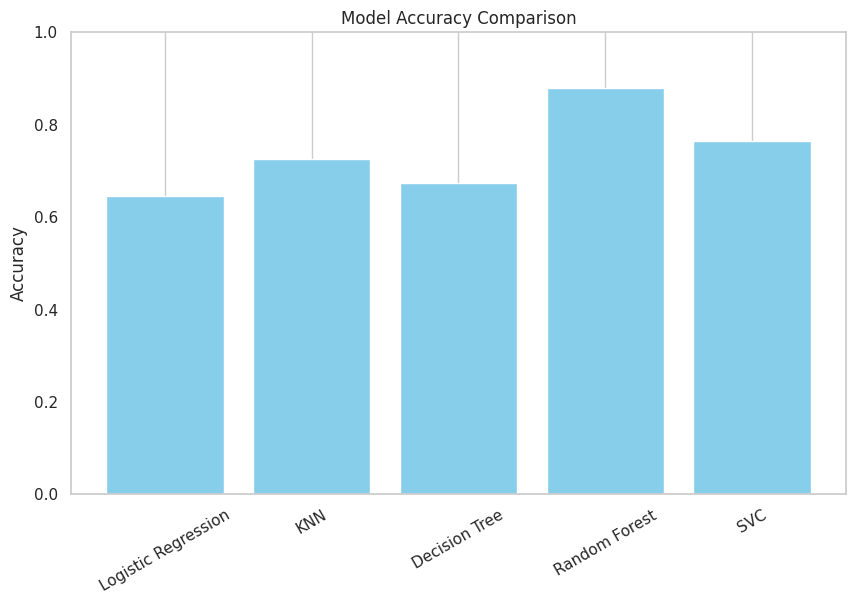

In [188]:
import matplotlib.pyplot as plt

model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVC']
accuracies = [accuracy_log, accuracy_knn, accuracy_dtree, accuracy_rf, accuracy_svc]

plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()

In [189]:
#Conclusion Random Forest emerged as the best model for both regression and classification tasks,